In [1]:
from sklearn.preprocessing import StandardScaler
from pycaret.regression import *
import pandas as pd
import numpy as np

In [2]:
ver1 = pd.read_csv('0918_eda_one_hot.csv').drop(['STRG_DT'], axis=1)
ver1_cont = ver1.drop(['cluster_1', 'cluster_2', 'cluster_3'], axis=1)
ver1_cat = ver1[['cluster_1', 'cluster_2', 'cluster_3']]

y_val = np.array(ver1_cont.iloc[:, 0]).reshape(-1, 1)
x_val = ver1_cont.drop(['FRST_TREE_CNT'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split

x_train_val, x_test_val = train_test_split(x_val, test_size= 0.2, shuffle = False)
y_train_val, y_test_val = train_test_split(y_val, test_size= 0.2, shuffle = False)

train_cat, test_cat = train_test_split(ver1_cat, test_size= 0.2, shuffle = False)
test_cat = test_cat.reset_index().drop(['index'], axis=1)

In [4]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_val)
y_test_scaled = y_scaler.transform(y_test_val)

x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train_val)
x_test_scaled = x_scaler.transform(x_test_val)

In [5]:
y_train_df = pd.DataFrame(y_train_scaled, columns = ['FRST_TREE_CNT'])
x_train_df = pd.DataFrame(x_train_scaled, columns = x_val.columns)

y_test_df = pd.DataFrame(y_test_scaled, columns = ['FRST_TREE_CNT'])
x_test_df = pd.DataFrame(x_test_scaled, columns = x_val.columns)

In [6]:
train_df = pd.concat([y_train_df, x_train_df, train_cat], axis=1)
test_df = pd.concat([y_test_df, x_test_df, test_cat], axis=1)

In [54]:
df1 = pd.concat([train_df, test_df]).reset_index().drop(['index'], axis=1)

In [8]:
df1

,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3
0,-0.102251,-0.043934,0.858048,-0.293285,-3.266703,0.190960,-0.672832,-0.075804,1,0,0
1,-0.102251,-0.010636,1.737274,-0.293285,-3.220612,0.190960,-0.672832,-0.075804,1,0,0
2,-0.102251,0.089257,1.417556,-0.293285,-3.189884,0.065110,-0.672832,-0.075804,1,0,0
3,-0.102251,0.067058,1.257696,-0.293285,-3.205248,0.149010,-0.672832,-0.075804,1,0,0
4,-0.102251,0.078158,1.231053,-0.293285,-3.251339,0.407701,-0.672832,-0.075804,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
26059,-2.324533,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1
26060,-2.324533,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1
26061,-2.324533,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1
26062,-2.324533,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1


In [9]:
#Setup 설정
model1 = setup(df1, target = 'FRST_TREE_CNT', train_size = 0.8, data_split_shuffle = False, fold_strategy='timeseries')

,Description,Value
0,Session id,5952
1,Target,FRST_TREE_CNT
2,Target type,Regression
3,Original data shape,"(26064, 11)"
4,Transformed data shape,"(26064, 11)"
5,Transformed train set shape,"(20851, 11)"
6,Transformed test set shape,"(5213, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [10]:
comp1 = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6267,0.6057,0.7353,-6.0023,0.3613,1.6341,0.2180
lightgbm,Light Gradient Boosting Machine,0.6199,0.6220,0.7446,-6.5615,0.3867,1.4421,0.1070
lar,Least Angle Regression,0.6728,0.7092,0.7734,-6.8252,0.3548,1.8670,0.0200
gbr,Gradient Boosting Regressor,0.6577,0.6812,0.7789,-7.5883,0.3827,1.6654,0.2870
catboost,CatBoost Regressor,0.6617,0.6798,0.7825,-7.1975,0.3835,1.6451,1.8220
br,Bayesian Ridge,0.6814,0.7257,0.7850,-6.8933,0.3598,1.8692,0.0200
ridge,Ridge Regression,0.6813,0.7256,0.7851,-6.8867,0.3599,1.8730,0.0190
lr,Linear Regression,0.6816,0.7260,0.7855,-6.8860,0.3598,1.8744,1.8200
huber,Huber Regressor,0.7007,0.7693,0.7985,-6.9972,0.3710,1.8136,0.0480
ada,AdaBoost Regressor,0.7020,0.8119,0.8047,-8.0686,0.3780,1.7654,0.0880


<br/> Extra Tree Regressor

In [11]:
et_model = create_model('et', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.1813,0.0541,0.2325,-1.2826,0.0717,0.0762


In [12]:
et_tuned = tune_model(et_model, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2821,0.1408,0.3753,-0.4843,0.2494,0.7736
1,0.6954,0.6354,0.7971,-4.4096,0.4951,0.7002
2,0.9280,0.9902,0.9951,-8.7284,0.4970,0.5998
3,0.4703,0.2610,0.5109,-2.6371,0.2713,0.7238
4,0.6321,0.6619,0.8136,-0.4866,0.4352,5.3704
5,1.0107,1.1291,1.0626,-12.9436,0.2297,2.3455
6,0.1626,0.0582,0.2413,-4.5547,0.1186,1.5694
7,0.2781,0.1080,0.3287,-1.1254,0.1998,1.9380
8,0.7055,0.8576,0.9260,-2.1697,0.4505,0.7672


[I 2023-09-25 03:27:36,929] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 03:40:12,012] Finished hyperparameter search!


In [13]:
et_final = finalize_model(et_tuned)

In [14]:
predict_model(et_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1093,0.0150,0.1226,0.3652,0.0374,0.0481


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.236755
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.236307
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.238398
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.238434
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.240284
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.275120
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.275120
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.274064
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.276572


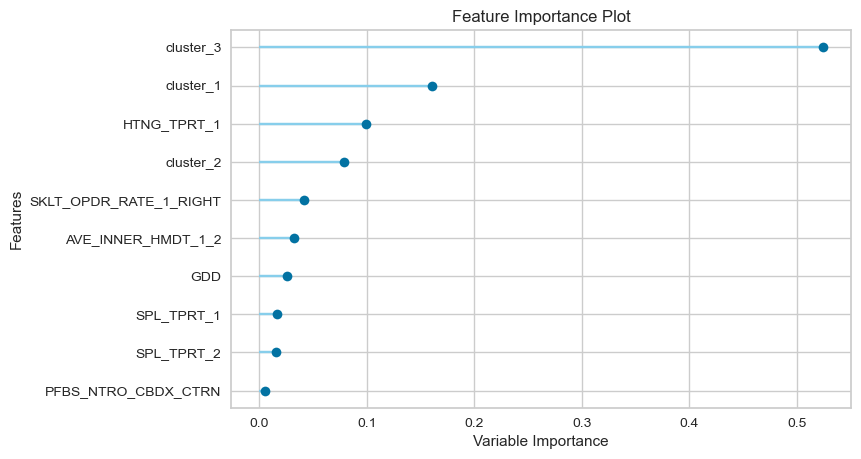

In [15]:
plot_model(et_final, plot='feature')

In [16]:
save_model(et_final, 'Extra_Tree_EDA_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(max_depth=9,
                                      max_features=0.44153447765177295,
                                      min_impurity_decrease=1.12335441909

In [17]:
Extra_Tree_EDA_TS = load_model('Extra_Tree_EDA_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Gradient Boosting Regressor

In [18]:
gbr_model = create_model('gbr', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.2476,0.1098,0.3313,-3.6339,0.1068,0.1048


In [19]:
gbr_tuned = tune_model(gbr_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2772,0.1446,0.3803,-0.5240,0.2411,0.7076
1,0.6816,0.6632,0.8144,-4.6464,0.4903,0.6693
2,0.8758,0.9536,0.9765,-8.3689,0.5007,0.5730
3,0.6498,0.4914,0.7010,-5.8470,0.3679,0.9427
4,0.6243,0.5978,0.7732,-0.3426,0.4122,4.9219
5,0.8063,0.8628,0.9289,-9.6548,0.3096,1.9007
6,0.2935,0.1465,0.3827,-12.9686,0.2128,2.3225
7,0.3563,0.2445,0.4945,-3.8101,0.2439,1.9230
8,0.6312,0.6652,0.8156,-1.4588,0.4628,0.7434


[I 2023-09-25 04:10:53,643] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 04:16:13,146] Finished hyperparameter search!


In [20]:
gbr_final = finalize_model(gbr_tuned)

In [21]:
predict_model(gbr_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0415,0.0029,0.0536,0.8789,0.0163,0.0182


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.174110
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.169392
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.196422
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.177298
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.174998
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.285530
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.288230
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.298243
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.299307


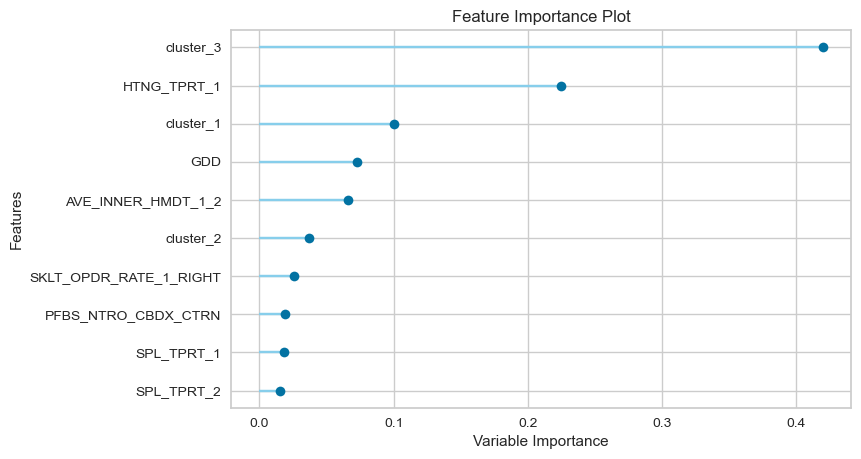

In [22]:
plot_model(gbr_final, plot='feature')

In [23]:
save_model(gbr_final, 'Gradient_Boosting_EDA_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.09175312230209909,
                                            max_depth=6,
                                            max_features=0.4

In [24]:
Gradient_Boosting_EDA_TS = load_model('Gradient_Boosting_EDA_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Light GBM

In [25]:
gbm_model = create_model('lightgbm', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.1650,0.0498,0.2231,-1.1013,0.0692,0.0698


In [26]:
gbm_tuned = tune_model(gbm_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2786,0.1337,0.3656,-0.4087,0.2431,0.8019
1,0.6355,0.5883,0.7670,-4.0087,0.4616,0.6153
2,0.9634,1.1470,1.0710,-10.2693,0.5646,0.6252
3,0.7134,0.5549,0.7449,-6.7320,0.4018,1.0389
4,0.6659,0.6714,0.8194,-0.5078,0.4387,4.9384
5,0.6462,0.5253,0.7248,-5.4874,0.3914,1.4171
6,0.3002,0.1899,0.4358,-17.1110,0.2328,2.6802
7,0.3056,0.1448,0.3806,-1.8491,0.2515,1.4106
8,0.6039,0.5964,0.7723,-1.2043,0.4408,0.7098


[I 2023-09-25 04:17:02,078] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 04:19:07,010] Finished hyperparameter search!


In [27]:
gbm_final = finalize_model(gbm_tuned)

In [28]:
predict_model(gbm_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0716,0.0083,0.0913,0.6482,0.0280,0.0314


[LightGBM] [Warning] feature_fraction is set=0.6216279603186944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6216279603186944
[LightGBM] [Warning] bagging_fraction is set=0.803400950246152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.803400950246152
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.181410
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.181410
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.181410
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.181410
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.181410
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.312918
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.312918
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.312918
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.312918


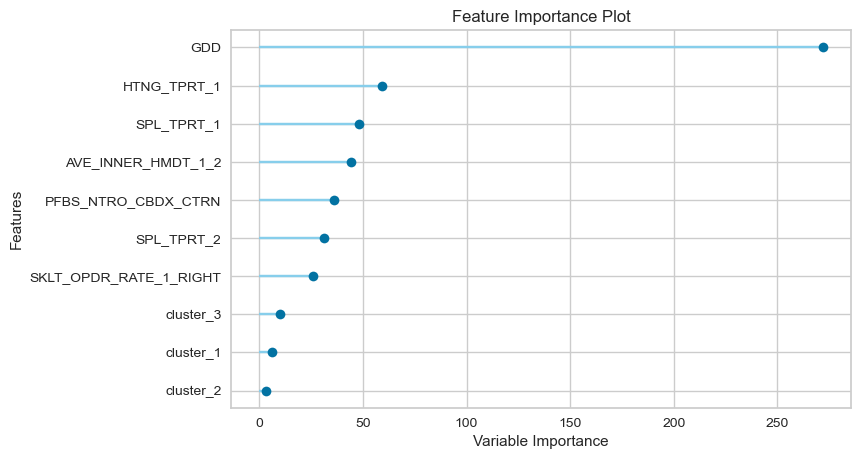

In [29]:
plot_model(gbm_final, plot='feature')

In [30]:
save_model(gbm_final, 'GBM_EDA_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImpu..._frequent'))),
                 ('actual_estimator',
                  LGBMRegressor(bagging_fraction=0.803400950246152,
                                bagging_freq=1,
                                feature_fraction=0.6216279603186944,
                          

In [31]:
GBM_EDA_TS = load_model('GBM_EDA_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Cat Boost Regressor

In [32]:
cb_model = create_model('catboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.2735,0.1480,0.3848,-5.2488,0.1277,0.1154


In [33]:
cb_tuned = tune_model(cb_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2771,0.1526,0.3907,-0.6085,0.2201,0.6702
1,0.6769,0.6414,0.8009,-4.4608,0.4862,0.6736
2,0.9382,1.0883,1.0432,-9.6920,0.5405,0.6113
3,0.6383,0.4689,0.6848,-5.5337,0.3701,0.9166
4,0.6107,0.5559,0.7456,-0.2485,0.3964,4.6651
5,0.8540,0.9156,0.9569,-10.3065,0.3219,2.2439
6,0.3756,0.2262,0.4756,-20.5752,0.2499,3.0743
7,0.3306,0.1617,0.4021,-2.1806,0.2352,1.9560
8,0.6394,0.6645,0.8151,-1.4559,0.4831,0.7608


[I 2023-09-25 04:19:17,019] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 04:25:43,018] Finished hyperparameter search!


In [34]:
cb_final = finalize_model(cb_tuned)

In [35]:
predict_model(cb_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1082,0.0159,0.1260,0.3301,0.0385,0.0474


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.304336
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.299453
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.304197
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.309080
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.304197
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.355110
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.356628
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.356628
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.354773


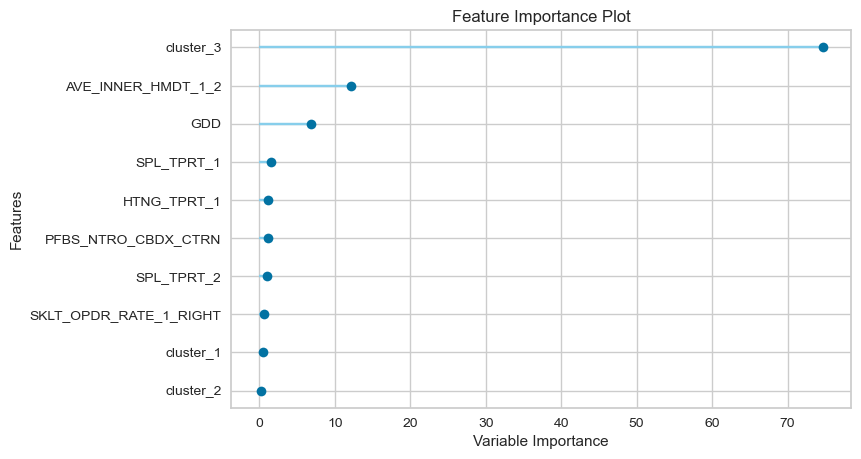

In [36]:
plot_model(cb_final, plot='feature')

In [37]:
save_model(cb_final, 'Cat_Boost_EDA_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  <catboost.core.CatBoostRegressor object at 0x000001DEFE2AE700>)]),
 'Cat_Boost_EDA_TS.pkl')

In [38]:
Cat_Boost_EDA_TS = load_model('Cat_Boost_EDA_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Least Angle Regressior

In [39]:
lar_model = create_model('lar', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5453,0.3492,0.5909,-13.7377,0.1962,0.2328


In [40]:
lar_tuned = tune_model(lar_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4022,0.2518,0.5018,-1.6538,0.1939,1.3323
1,0.6922,0.6518,0.8073,-4.5495,0.4904,0.6860
2,0.9557,1.0164,1.0082,-8.9864,0.5010,0.6202
3,0.4279,0.2522,0.5022,-2.5135,0.2650,0.6759
4,0.7345,0.8919,0.9444,-1.0031,0.4897,6.0981
5,1.1501,1.4195,1.1914,-16.5297,0.2319,2.7810
6,0.2850,0.1068,0.3268,-9.1863,0.1869,2.9728
7,0.3455,0.1889,0.4347,-2.7170,0.2398,2.1725
8,0.4951,0.4040,0.6356,-0.4932,0.3680,0.7752


[I 2023-09-25 04:26:37,744] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 04:26:57,774] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
lar_final = finalize_model(lar_tuned)

In [42]:
predict_model(lar_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,0.1856,0.0490,0.2213,-1.0674,0.0675,0.0785


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.268233
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.263144
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.258615
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.257634
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.253111
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.220115
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.220035
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.224053
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.226600


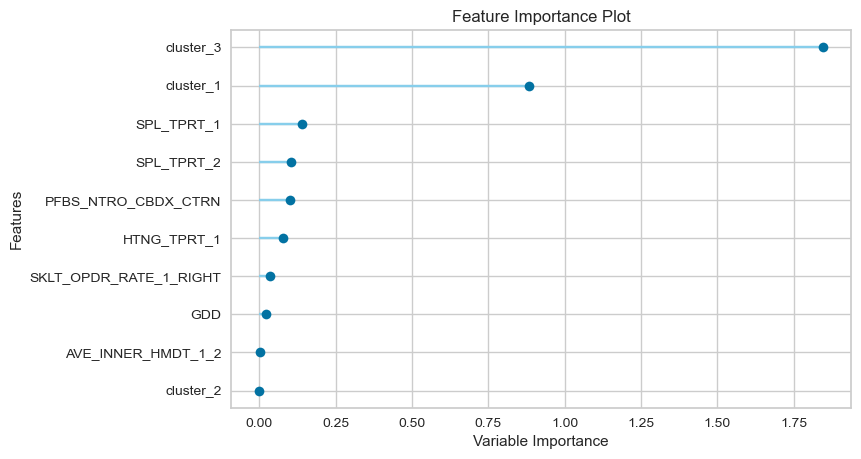

In [43]:
plot_model(lar_final, plot='feature')

In [44]:
save_model(lar_final, 'LAR_EDA_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', Lars(random_state=5952))]),
 'LAR_EDA_TS.pkl')

In [45]:
LAR_EDA_TS = load_model('LAR_EDA_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Model Ensemble 1

In [46]:
Blend1_EDA_TS = blend_models([Gradient_Boosting_EDA_TS, GBM_EDA_TS], choose_better=True, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2778,0.1387,0.3725,-0.4623,0.2413,0.7543
1,0.6578,0.6211,0.7881,-4.2883,0.4765,0.6408
2,0.9187,1.0377,1.0187,-9.1955,0.5297,0.5984
3,0.6802,0.5104,0.7144,-6.1114,0.3831,0.9894
4,0.6400,0.6185,0.7864,-0.3891,0.4197,4.9258
5,0.7262,0.6669,0.8166,-7.2351,0.3350,1.6588
6,0.2875,0.1573,0.3966,-14.0045,0.2138,2.4188
7,0.3256,0.1805,0.4249,-2.5517,0.2342,1.6166
8,0.6162,0.6273,0.7920,-1.3185,0.4538,0.7184


Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [47]:
Blend1_tuned = tune_model(Blend1_EDA_TS, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2736,0.1397,0.3737,-0.4721,0.2332,0.7190
1,0.6639,0.6386,0.7991,-4.4372,0.4774,0.6504
2,0.9537,1.1643,1.0790,-10.4389,0.5659,0.6195
3,0.6825,0.5194,0.7207,-6.2368,0.3901,0.9805
4,0.6348,0.6292,0.7932,-0.4131,0.4176,4.8350
5,0.6494,0.5336,0.7305,-5.5890,0.3964,1.3605
6,0.2840,0.1766,0.4202,-15.8418,0.2335,2.5975
7,0.2911,0.1412,0.3758,-1.7783,0.2648,0.9490
8,0.6227,0.6328,0.7955,-1.3389,0.4630,0.7458


[I 2023-09-25 04:38:39,532] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 04:40:24,988] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [50]:
EDA_TS_ENS1 = finalize_model(Blend1_tuned)

In [51]:
predict_model(EDA_TS_ENS1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0716,0.0083,0.0913,0.6482,0.0280,0.0314


[LightGBM] [Warning] feature_fraction is set=0.6216279603186944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6216279603186944
[LightGBM] [Warning] bagging_fraction is set=0.803400950246152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.803400950246152
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.181410
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.181410
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.181410
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.181410
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.181410
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.312918
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.312918
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.312918
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.312918


In [52]:
save_model(EDA_TS_ENS1, 'EDA_TS_ENS1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImpu..._frequent'))),
                 ('actual_estimator',
                  LGBMRegressor(bagging_fraction=0.803400950246152,
                                bagging_freq=1,
                                feature_fraction=0.6216279603186944,
                          

In [53]:
EDA_TS_ENS1 = load_model('EDA_TS_ENS1', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded
